In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

from scipy.io import loadmat
import numpy as np
import torch.utils.data
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
from scipy import misc
import matplotlib.patches as patches
from datetime import datetime
from scipy.misc import imshow
import model_code.multi_modal_nn as mmnn
from model_code.face_landmark_dataset import FaceLandmarksDataset
import model_code.test as test
import model_code.train as train

In [2]:
def extract_data(indices, suffix = '', include_pos = True):
  ftrs = torch.Tensor()
  ftrs = ftrs.type(torch.cuda.FloatTensor)  
  gz = torch.Tensor()
  gz = gz.type(torch.cuda.FloatTensor) 
    
  eye_reg = torch.Tensor()
  eye_reg = eye_reg.type(torch.cuda.IntTensor)
    
    
  img_loc = np.asarray([])
#   img_loc = img_loc.type(torch.cuda.FloatTensor) 
  
  for index in indices:
    data = loadmat(str(index) + suffix + '_lmarks_location_eye.mat')
    
    #Landmark features
    ftrs_single = torch.from_numpy(data['ftrs'])
    
    
    ftrs_single = ftrs_single.type(torch.cuda.FloatTensor)  

    
    ftrs = torch.cat((ftrs, ftrs_single))
    
    #Gaze features

    gz_single = torch.from_numpy(data['gz'])
    gz_single = gz_single.type(torch.cuda.FloatTensor)  

    gz_single = torch.t(gz_single)

    gz = torch.cat((gz, gz_single))
    
    
    #Eye regions should be n X 4 size
    
    eye_reg_single = torch.from_numpy(data['eye_reg'])
    eye_reg_single = eye_reg_single.type(torch.cuda.IntTensor)
    
    
    eye_reg = torch.cat((eye_reg, eye_reg_single))
    
    
    #Get image location
    
    img_loc_single = data['location']
        
    img_loc = np.concatenate((img_loc, img_loc_single))
    
  return(ftrs, gz, eye_reg, img_loc)


In [3]:
(net, optimizer,scheduler) = mmnn.get_net_instance()



In [4]:
train_indices = [401,402,403,405]

ftrs = torch.Tensor()
gz = torch.Tensor()

(ftrs, gz, eye_reg, img_loc) = extract_data(train_indices)

up = 0
down= 10000

face_landmarks_dataset = FaceLandmarksDataset(ftrs = ftrs[up:down], eye_regions= eye_reg.cuda()[up:down], locations=img_loc[up:down],  gz = gz.cuda()[up:down], train_transforms=None, test_transforms=None)


(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.503906, lr is 0.000100, loss is 0.693868
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.525391, lr is 0.000200, loss is 0.691406
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.482422, lr is 0.000300, loss is 0.699062
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.482422, lr is 0.000400, loss is 0.697399
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.515625, lr is 0.000500, loss is 0.694077
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.503906, lr is 0.000600, loss is 0.693983
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.517578, lr is 0.000700, loss is 0.690938
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.519531, lr is 0.000800, loss is 0.694272
(torch.Size([512, 1024]), torch.

(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.613281, lr is 0.006900, loss is 0.677684
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.615234, lr is 0.007000, loss is 0.681091
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.583984, lr is 0.007100, loss is 0.685612
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.605469, lr is 0.007200, loss is 0.680253
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.625000, lr is 0.007300, loss is 0.678287
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.609375, lr is 0.007400, loss is 0.680804
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.605469, lr is 0.007500, loss is 0.679119
(torch.Size([512, 1024]), torch.Size([512, 34]))
Completed batch, accuracy is 0.607422, lr is 0.007600, loss is 0.676196
(torch.Size([512, 1024]), torch.

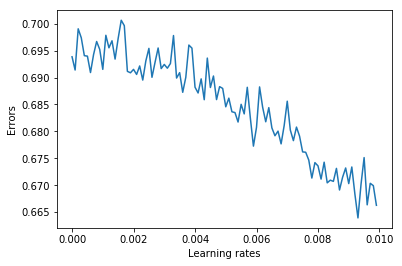

In [5]:
mmnn.lr_finder(optimizer, net, face_landmarks_dataset , 5, 1, True, batch_size = 512, lr_begin = 0.00001, lr_step = 10)